<a href="https://colab.research.google.com/github/YaroslavSnarski/NLP-Spacy/blob/main/Information_Extraction_with_SpaCy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Текст как данные. Извлечение информации из текстов для социальных наук

Этот ноутбук предлагает введение в **извлечение информации** (Information Extraction, IE) из текста для нужд социальных наук.

Извлечение информации - это набор техник для превращения текстовых документов в структурированные данные путем извлечения релевантных слов, фраз и прочей информации из содержания документа.

Наши данные - набор новостных сообщений из разных активистских социальных сетей по регионам России. Изначально данные представлены в виде нескольких json файлов, которые были получены с помощью `API`.

In [ ]:
import pandas as pd
import glob, os, json


json_dir = 'json_actions_data'

json_pattern = os.path.join(json_dir, '*.json')
file_list = glob.glob(json_pattern)

dfs = []
for file in file_list:
    with open(file, encoding="utf-8") as f:
        json_data = pd.json_normalize(json.loads(f.read()))
    dfs.append(json_data)

df = pd.concat(dfs)

In [ ]:
df[4:6]

,id,title,slug,text,createdAt,start,end,type,status,view,...,user.file.oldPath,user.createdAt,user.type,user.publicationCount,user.level,user.followerCount,user.about,user.status,user.commentsCount,location.district
4,e66ce668-8372-4b45-8223-3fecdc6f4e53,Жители Владивостока вышли в защиту Тихвинского...,zhiteli-vladivostoka-vyshli-v-zashitu-tihvinsk...,<p>Во Владивостоке жители провели 3 февраля <a...,2024-02-03T12:07:04.451Z,2024-02-03T10:00:40.615Z,2024-02-03T12:00:40.615Z,action,approved,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,63bd9895-c5f6-4f25-9bba-261844b77c16,В Новосибирске коммунисты вышли на пикет за св...,v-novosibirske-kommunisty-vyshli-na-piket-za-s...,<p>Новосибирцы из социалистического движения «...,2024-02-03T11:58:35.690Z,2024-02-03T11:53:49.437Z,2024-02-03T11:53:49.437Z,action,approved,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.reset_index(inplace=True, drop = True)

In [ ]:
df['text'][4010][:500]

'<p>В Абзелиловском районе Башкирии в субботу, 31 октября, прошла акция по спасению кужановских лиственниц. Об этом <a href="https://vk.com/wall-198027399_2514" target="_blank" rel="noreferrer noopener">сообщает</a> группа "Кыркты Тау будет жить".</p><p><br /></p><p><img src="/uploads/files/36/d87e8a9db443531aaf1a8c78fc4cbfcb.jpg" width="871" height="652" alt="d87e8a9db443531aaf1a8c78fc4cbfcb.jpg" style="width:871px;height:652px;" /><br /></p><p><br /></p><p>11 уникальных лиственниц, оберегаемых '

In [ ]:
import re
CLEANR = re.compile('<.*?>')

def clear_html(text):
    cleantext = re.sub(CLEANR, '', text)
    return cleantext


def clear_text(text):
    clear_text = re.sub(r'[^А-яЁё\d\.\, ]+', '', text)#.lower()
    clear_text = re.sub(r'http\S+', '', clear_text)
    return " ".join(clear_text.split())#.strip())

In [ ]:
def fix_punctuation(text):
    def sentence_case(text):
        # Split into sentences. Therefore, find all text that ends
        # with punctuation followed by white space or end of string.
        sentences = re.findall(r'(?:\d+\.\d+|\b[A-Z](?:\.[A-Z])*\b\.?|[^.!?])+[.!?](?:\s|\Z)', text)

        # Capitalize the first letter of each sentence
        sentences = [x[0].upper() + x[1:] for x in sentences]

        # Combine sentences
        return ''.join(sentences)

    #add space after punctuation
    text = re.sub(r'(\d+\.\d+|\b[A-Z](?:\.[A-Z])*\b\.?)|([.,;:!?)])\s*', lambda x: x.group(1) or f'{x.group(2)} ', text)
    #capitalize sentences
    return sentence_case(text)

In [ ]:
import time
start_clean = time.time()

df['text_clear'] = df['text']\
                                .apply(lambda x: fix_punctuation(clear_text(clear_html(str(x)))))#cleanhtml(str(x)).clean_text(str(x)))

print('Обработка текстов заняла: '+str(round(time.time() - start_clean, 2))+' секунд')

Обработка текстов заняла: 3.68 секунд


In [ ]:
print(df['text'][4010][:300])
print('\n')
print(df['text_clear'][4010][:300])

<p>В Абзелиловском районе Башкирии в субботу, 31 октября, прошла акция по спасению кужановских лиственниц. Об этом <a href="https://vk.com/wall-198027399_2514" target="_blank" rel="noreferrer noopener">сообщает</a> группа "Кыркты Тау будет жить".</p><p><br /></p><p><img src="/uploads/files/36/d87e8a


В Абзелиловском районе Башкирии в субботу, 31 октября, прошла акция по спасению кужановских лиственниц. Об этом сообщает группа Кыркты Тау будет жить. 11 уникальных лиственниц, оберегаемых местными жителями, накануне подпилили неизвестные вандалы. 400летние деревья возле деревни Кужаново не пошли на


In [ ]:
df[4:6]

,id,title,slug,text,createdAt,start,end,type,status,view,...,user.createdAt,user.type,user.publicationCount,user.level,user.followerCount,user.about,user.status,user.commentsCount,location.district,text_clear
4,e66ce668-8372-4b45-8223-3fecdc6f4e53,Жители Владивостока вышли в защиту Тихвинского...,zhiteli-vladivostoka-vyshli-v-zashitu-tihvinsk...,<p>Во Владивостоке жители провели 3 февраля <a...,2024-02-03T12:07:04.451Z,2024-02-03T10:00:40.615Z,2024-02-03T12:00:40.615Z,action,approved,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Во Владивостоке жители провели 3 февраля народ...
5,63bd9895-c5f6-4f25-9bba-261844b77c16,В Новосибирске коммунисты вышли на пикет за св...,v-novosibirske-kommunisty-vyshli-na-piket-za-s...,<p>Новосибирцы из социалистического движения «...,2024-02-03T11:58:35.690Z,2024-02-03T11:53:49.437Z,2024-02-03T11:53:49.437Z,action,approved,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Новосибирцы из социалистического движения Крас...


### Временной ряд для новостных сообщений
Посмотрим на основные тренды в частоте сообщений среди собранных нами данных.

In [ ]:
#df['date'] = pd.to_datetime(df['start']).apply(lambda x: x.strftime('%Y-%m-%d'))
df['Date'] = pd.to_datetime(df['start'].astype(str).str[0:10])
df['count'] = 1

In [ ]:
df_ts = df.resample(rule='M', on='Date')['count'].sum()

In [ ]:
list_match = pd.DataFrame(df_ts[516:624]) #[43:] for years
list_match.index

DatetimeIndex(['2013-01-31', '2013-02-28', '2013-03-31', '2013-04-30',
               '2013-05-31', '2013-06-30', '2013-07-31', '2013-08-31',
               '2013-09-30', '2013-10-31',
               ...
               '2021-03-31', '2021-04-30', '2021-05-31', '2021-06-30',
               '2021-07-31', '2021-08-31', '2021-09-30', '2021-10-31',
               '2021-11-30', '2021-12-31'],
              dtype='datetime64[ns]', name='Date', length=108, freq='M')

In [ ]:
import itertools
df_ts.values.tolist()
data_count = list(itertools.chain.from_iterable(list_match.values.tolist()))

indices = df_ts.index
values = df_ts.values
df_overall = pd.DataFrame(list(zip(pd.to_datetime(indices), data_count)),
               columns =['indices','values'])

df_overall.tail(20)


,indices,values
88,1977-05-31,35
89,1977-06-30,67
90,1977-07-31,103
91,1977-08-31,96
92,1977-09-30,111
93,1977-10-31,134
94,1977-11-30,109
95,1977-12-31,115
96,1978-01-31,79
97,1978-02-28,43


<Axes: xlabel='Date', ylabel='values'>

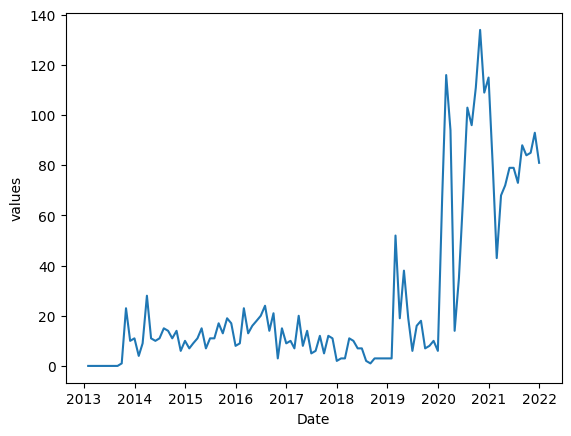

In [ ]:
import seaborn as sns
sns.lineplot(x=list_match.index, y="values", data=df_overall)


In [ ]:
news_articles_df = df[['id','title','text_clear','Date',
                       'location.lat', 'location.lon',
                       'region.name','region.country',
                       'tags']]

news_articles_df = news_articles_df.loc[(news_articles_df['Date'] > '2016-01-01') & \
                                        (news_articles_df['Date'] <= '2021-12-31')]
news_articles_df[1:5]

,id,title,text_clear,Date,location.lat,location.lon,region.name,region.country,tags
2855,4687a143-7899-4ab6-af45-b85062fd13df,Жители Ленобласти создают мемы о мусорных поли...,"Жители Ленинградской области собрали мемы, пос...",2021-12-31,60.0793208,31.8926644,Ленинградская область,Россия,"[{'name': 'мусорный полигон', 'id': 'f7963ad3-..."
2856,953891c7-7f48-4da4-a94c-faa488424e12,Жители Томска вышли в поддержку осужденного мэ...,Жители Томска собрались возле Советского район...,2021-12-30,56.4686185,84.97755099999999,Томская область,Россия,"[{'name': 'нородный мэр', 'id': 'a8d4aea6-f266..."
2857,dfb9c24d-7de7-4394-a5ba-a8b95baf51f0,В Улан-Удэ жители добились сноса вышки 5G,29 декабря жители Железнодорожного района Улан...,2021-12-30,51.8335896,107.5840434,Республика Бурятия,Россия,"[{'name': 'народный сход', 'id': '31d85173-3f1..."
2858,cbe4a1f6-a8ed-4c8a-8566-eb89b4cf3603,В Поварово прошли пикеты против вырубки леса,Жители Поварово 28 декабря провели одиночные п...,2021-12-28,56.07775549999999,37.0576875,Московская область,Россия,"[{'name': 'поварово', 'id': '46890ada-b078-40d..."


In [ ]:
news_articles_df[1000:1010]

,id,title,text_clear,Date,location.lat,location.lon,region.name,region.country,tags
3856,412107fb-e2c3-454c-b5a8-5bdc605808df,153-й день протеста в Хабаровске,153й день протеста в Хабаровске. Сегодня прошл...,2020-12-10,55.7558488,37.61767830000001,Москва,Россия,"[{'name': 'хабаровск', 'id': '53f2c281-3e9f-45..."
3857,360e756a-91e7-468e-82ea-22589f306d6b,​В Кунцево началась вырубка деревьев под строи...,"В московском районе Кунцево, на улице Ивана Фр...",2020-12-10,55.7558488,37.61767830000001,Москва,Россия,[]
3858,3012987e-32b3-4bd9-a6ee-aae6a0c149d1,Пикеты у Мосгордумы: москвичи требуют внести п...,В Московской городской думе продолжается обсуж...,2020-12-10,55.7558488,37.61767830000001,Москва,Россия,"[{'name': 'дефицит бюджета', 'id': 'ce832d00-1..."
3859,218797fe-60db-4be3-8d57-a36eb6aa06f0,В Котласе прошел пикет городских котов,"В Котласе на пикет вышли городские коты, сообщ...",2020-12-09,64.5388658,40.518978,Архангельская область,Россия,"[{'name': 'пикет', 'id': '49e7c91c-25b1-4626-a..."
3860,72a0f5ba-378d-43f3-aaf6-21700399414f,Росимущество принуждает жителей дома его снести,Жильцы дома на улице 4я Советская в Иркутске 9...,2020-12-09,52.545053,103.8886585,Иркутская область,Россия,"[{'name': 'снос дома', 'id': '5d2bce6d-d1c1-45..."
3861,5f1aae92-900b-4ab6-b3dc-8dea5425aa3b,Защитники Кунцево обращаются в Госдуму,В среду защитники рощи на улице Ивана Франко п...,2020-12-09,55.7558488,37.61767830000001,Москва,Россия,"[{'name': 'битцевский лес', 'id': 'fdba0522-b7..."
3862,da620a73-4a5f-4b49-8d8b-a13767613a3f,​152-й день протеста в Хабаровске,"В среду, 9 декабря, в Хабаровске продолжаются ...",2020-12-09,48.4724505,135.057561,Хабаровский край,Россия,"[{'name': 'акции в поддержку фургала', 'id': '..."
3863,9b96ddf6-a165-43ff-846a-3c47e05db3a5,Пикеты против уничтожения парков в Москве,Возле Московской городской думы прошли пикеты ...,2020-12-09,55.7558488,37.61767830000001,Москва,Россия,[]
3864,5dc86050-658e-49bb-9e78-addeaa2e015f,«Родительский отпор» против дистанционного обу...,Лидер движения Родительский отпор Николай Мишу...,2020-12-09,55.7558488,37.61767830000001,Москва,Россия,"[{'name': 'школа', 'id': '50b3b6fc-0808-4b52-b..."
3865,9a746af3-118a-45cc-bf12-759f7f03ebd0,Поход на мэрию против дистанционного образован...,9 декабря движение Родители Москвы вместе с де...,2020-12-09,55.7558488,37.61767830000001,Москва,Россия,"[{'name': 'дистанционное обучение', 'id': '812..."


## Spacy

Давайте установим `spaCy` - библиотеку для работы с анализом естественного языка. Дополнительно установим "большую" и "маленькую" языковые модели, которые помогут нам проанализировать наши тексты.

In [ ]:
#!pip install --upgrade spacy

import spacy
from spacy.lang.ru.examples import sentences

#!python -m spacy download ru_core_news_lg

#nlp_sm = spacy.load("ru_core_news_sm")
nlp = spacy.load("ru_core_news_lg")

#import ru_core_news_sm
import ru_core_news_lg


In [ ]:
from tqdm.autonotebook import tqdm

news_reports = [i for i in news_articles_df['text_clear']]
docs_reports = list(tqdm(nlp.pipe(news_reports), total=len(news_reports)))

C:\Users\snarski\AppData\Local\Temp\ipykernel_22072\3768191827.py:1: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


  0%|          | 0/2540 [00:00<?, ?it/s]

In [ ]:
# посмотрим, сколько слов в документе 2010
len(docs_reports[2010])

222

In [ ]:
# посмотрим на список атрибутов на уровне документа
dir(docs_reports[2010])

['_',
 '__bytes__',
 '__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__ne__',
 '__new__',
 '__pyx_vtable__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__unicode__',
 '_bulk_merge',
 '_context',
 '_get_array_attrs',
 '_realloc',
 '_vector',
 '_vector_norm',
 'cats',
 'char_span',
 'copy',
 'count_by',
 'doc',
 'ents',
 'extend_tensor',
 'from_array',
 'from_bytes',
 'from_dict',
 'from_disk',
 'from_docs',
 'from_json',
 'get_extension',
 'get_lca_matrix',
 'has_annotation',
 'has_extension',
 'has_unknown_spaces',
 'has_vector',
 'is_nered',
 'is_parsed',
 'is_sentenced',
 'is_tagged',
 'lang',
 'lang_',
 'mem',
 'noun_chunks',
 'noun_chunks_iterator',
 'remove_extension',
 'retokenize',
 'sentiment'

In [ ]:
docs_reports[2010].has_annotation("TAG")

True

In [ ]:
docs_reports[2010]

Жители российских городов и сёл выходят на очередной день экопротеста, чтобы заявить свое несогласие с мусорной политикой государства и в частности стройкой полигона Шиес на границе Архангельской области и республики Коми. Работы на станции Шиес заморожены до получения необходимой документации, но по свидетельству защитников Шиеса, незаконные действия строителей в районе стройки продолжаются и сейчас. Особенно сильно идут вразрез с заявлениями должностных лиц факты столкновений активистов с сотрудниками частного охранного предприятия и полиции, пишут они в группе Поморье не помойка, Продолжаются избиения, задержания и неадекватные судебные решения. Не закрываются сфабрикованные уголовные дела. Федеральная власть почти не реагирует на происходящее. На митингах и пикетах в эти выходные активисты требуют прекратить все административные и уголовные дела против экоактивистов, закрыть проект Экотехнопарк Шиес и рекультивировать вырубленный под него участок леса, внедрить новые способы обраще

In [ ]:
# мы можем отыскать токены по их индексу в документе:
print(docs_reports[2010][5])
#dir(docs_reports[2010][5])

выходят


In [ ]:
docs_reports[2010][-2]

проспекта

In [ ]:
print(docs_reports[2010][-2].ent_type_)

LOC


In [ ]:
spacy.explain("GPE")

'Countries, cities, states'

Один из перечисленных атрибутов - информация о наименованной сущности. Используя встроенный визуализатор `spaCy`, мы можем посмотреть на все обнаруженные сущности в этом документе.

TIP: чтобы понять тип лейбла, предсказанный spaCy, мы можем использовать функцию `spacy.explain()`.

In [ ]:
from spacy import displacy
displacy.render(docs_reports[2010], style="ent", jupyter = True)

In [ ]:
spacy.explain("GPE") # гео-политические сущности

'Countries, cities, states'

In [ ]:
news_articles_df['text_clear'][4868]

'Жители российских городов и сёл выходят на очередной день экопротеста, чтобы заявить свое несогласие с мусорной политикой государства и в частности стройкой полигона Шиес на границе Архангельской области и республики Коми. Работы на станции Шиес заморожены до получения необходимой документации, но по свидетельству защитников Шиеса, незаконные действия строителей в районе стройки продолжаются и сейчас. Особенно сильно идут вразрез с заявлениями должностных лиц факты столкновений активистов с сотрудниками частного охранного предприятия и полиции, пишут они в группе Поморье не помойка, Продолжаются избиения, задержания и неадекватные судебные решения. Не закрываются сфабрикованные уголовные дела. Федеральная власть почти не реагирует на происходящее. На митингах и пикетах в эти выходные активисты требуют прекратить все административные и уголовные дела против экоактивистов, закрыть проект Экотехнопарк Шиес и рекультивировать вырубленный под него участок леса, внедрить новые способы обращ

In [ ]:
nlp_sm = spacy.load("ru_core_news_sm")
import ru_core_news_sm

doc2010 = nlp_sm(news_articles_df['text_clear'][4868])
displacy.render(doc2010, style="ent", jupyter = True)

## Извлечение Информации и Структурированное Предсказание

Извлечение информации - одна из многих задач текстового анализа. Задачи анализа текстов в социальных науках, как правило, сфокусированы на анализе целых документов и предсказании лейбла или некоторой численной оценки всего документа. Например,

- классификация документов: f(документ) $\rightarrow$ лейбл
- тематическое моделирование / кластеризация текстов: f(документ) $\rightarrow$ принадлежность к классу
- анализ тональности: f(документ, словарь) $\rightarrow$ оценка тональности

Эти методы работают на уровне *документа*: документ (текст) обычно представляется в виде числового вектора, и к этому вектору применяется некоторая функция.

- Вопрос: каким образом мы можем представить документы для компьютера?

Напротив, извлечение информации - это задача "структурированного предсказания": она принимает последовательность токенов и возвращает структурированные данные, такие как идентификация конкретных подстрок (spans) в фрагменте текста, назначение меток/лейблов для отдельных токенов или идентификация взаимосвязей между токенами или подстроками (spans).

Извлечение информации, как правило, полезно для различных целей, отличных от классических методов анализа текста, таких как тематические модели. Во многих моделях, основанных на документах, интерес представляет сам текст: о чем говорят выступающие, как темы сочетаются друг с другом, как некоторая интервенция влияет на то, что кто-то напишет, и т.д. Во многих случаях использования извлечения информации текст является просто удобным источником данных, из которого можно извлечь структурированную информацию, полезную для последующего анализа.

Давайте подробнее рассмотрим, что делает spaCy, когда выполняет распознавание именованных сущностей.

In [ ]:
[(i.text, i.ent_iob_ + "-" + i.ent_type_) for i in doc2010[25:50]]

[('на', 'O-'),
 ('границе', 'O-'),
 ('Архангельской', 'B-LOC'),
 ('области', 'I-LOC'),
 ('и', 'O-'),
 ('республики', 'O-'),
 ('Коми', 'B-LOC'),
 ('.', 'O-'),
 ('Работы', 'O-'),
 ('на', 'O-'),
 ('станции', 'O-'),
 ('Шиес', 'B-LOC'),
 ('заморожены', 'O-'),
 ('до', 'O-'),
 ('получения', 'O-'),
 ('необходимой', 'O-'),
 ('документации', 'O-'),
 (',', 'O-'),
 ('но', 'O-'),
 ('по', 'O-'),
 ('свидетельству', 'O-'),
 ('защитников', 'O-'),
 ('Шиеса', 'B-PER'),
 (',', 'O-'),
 ('незаконные', 'O-')]

`spaCy` предсказывает для каждого токена некоторый лейбл. В нашем случае у лейбла есть две части: тип сущности (**PER**son, **G**eo**P**olitical **E**ntity, **ORG**anization, **TIME**, etc...) и второй компонент - это тэг "BIO", который фисирует позицию токена в начале (**B**eginning) наименованной фразы, внутри (**I**nside) нее или за ее пределами (**O**utside).

* Вопрос: Почему нам бы хотелось предсказывать **BIO** тэг, наряду с лейблом именованной сущности?

## Модели для Named Entity Recognition

Итак, как мы получаем эти метки (лейблы)?

Есть несколько способов решения этой проблемы. Наиболее простой - обучить классификатор на уровне токена, предсказывающий метку именованной сущности для каждого токена в отдельности.

* **Вопрос**: В чем проблема такого подхода?



### Классические подходы

Еще недавно исследователи использовали ручные подходы к предсказанию меток (лейблов) именованных сущностей для токена:

* по словарям
* по части речи и т.д.

Плюс подробная информация о форме слова:

- слово написано капсом?
- с заглавной буквы?
- содержит дефис?

Эти особенности затем могут быть введены в модель для прогнозирования более точных меток (лейблов). Это могут быть либо модели, которые предсказывают каждый токен независимо (SVM), либо модели, которые учитывают последовательность меток (скрытые марковские модели, условные случайные поля и т.д.).

### Современные подходы

Современные подходы к распознаванию именованных объектов преимущественно используют нейронные сети. Нейронные сети обеспечивают гораздо большую точность, чем классические методы, и не требуют обширных функций ручной настройки).

![deep-learning-formula-nlp_example.png](https://explosion.ai/blog/deep-learning-formula-nlp_example.svg)

Рамка "Embed-encode-attend-predict" предложена [Matt Honnibal](https://explosion.ai/blog/deep-learning-formula-nlp):


### Типы извлечения информации

Существует множество методов извлечения информации, помимо распознавания именованных сущностей (NER).

- **named entity recognition**
- **entity disambiguation/resolution/linking/lookup**
- **relation extraction**
- **Open IE**: Открытое извлечение информации может возвращать несколько триплетов
- **event extraction/frame semantic parsing**
- **question answering**

## Приложение NER

На какие вопросы мы можем ответить с помощью NER и как это согласуется с нашими исследованиями?

Самые простые вопросы - это простые описательные вопросы, особенно вопросы, которые могут быть полезны в начале исследовательского проекта или когда исследователь хотел бы лучше понять содержание корпуса.

Один из самых простых вопросов, который можно задать, - какие люди, организации и места упоминаются чаще всего?

* **Вопрос**: Как это может быть полезно в исследованиях?

In [ ]:
len(docs_reports)

2540

In [ ]:
## refresher on the spacy objects:

# list of docs --> doc --> spans and docs --> tokens
# ent.text
# [token for token in doc]

In [ ]:
from collections import Counter

all_locs = []
for d in docs_reports:
    orgs = [ent.text for ent in d.ents if ent.label_ == "LOC"]
    all_locs.extend(orgs)

Counter(all_locs).most_common(15)

[('России', 1991),
 ('Москвы', 756),
 ('Москве', 638),
 ('РФ', 556),
 ('Хабаровске', 306),
 ('Московской области', 303),
 ('Петербурге', 280),
 ('Хабаровского края', 183),
 ('Петербурга', 176),
 ('Хабаровска', 149),
 ('Казани', 138),
 ('Москва', 135),
 ('Беларуси', 96),
 ('СанктПетербурге', 93),
 ('Ленина', 93)]

In [ ]:
from collections import Counter

all_orgs = []
for d in docs_reports:
    orgs = [ent.text for ent in d.ents if ent.label_ == "ORG"]
    all_orgs.extend(orgs)

Counter(all_orgs).most_common(15)[5:]

[('ЖК', 119),
 ('Мосгордумы', 117),
 ('ОВД', 102),
 ('СИЗО', 98),
 ('Яблоко', 89),
 ('МВД', 85),
 ('Госдуму', 68),
 ('ВНИИБ', 67),
 ('Единой России', 66),
 ('ООПТ', 59)]

### Еще один пример: какие места наиболее конфликтны?

Какие места упоминаются рядом с определенными ключевыми словами? На практике это включало бы просмотр организаций наряду с классификациями документов или темами, но мы можем использовать ключевые слова в качестве грубого приближения здесь.


* **Вопрос**: Какие места упоминаются чаще всего наряду с упоминаниями о "акция", "митинг" или "протест"?


In [ ]:
#@title
protest_locs = []
for d in docs_reports:
    for ent in d.ents:
        if ent.label_ != "LOC":
            continue
        if re.search("акция|митинг|протест", ent.sent.text):
            protest_locs.append(ent.text)

Counter(protest_locs).most_common(20)


[('Хабаровске', 177),
 ('Москве', 116),
 ('России', 105),
 ('Москвы', 69),
 ('Хабаровска', 62),
 ('РФ', 61),
 ('Петербурге', 46),
 ('Хабаровского края', 42),
 ('Архангельской области', 41),
 ('Московской области', 32),
 ('Шиес', 31),
 ('Ленина', 28),
 ('Беларуси', 28),
 ('Коми', 26),
 ('русского севера', 21),
 ('Екатеринбурге', 19),
 ('Казани', 18),
 ('Петербурга', 18),
 ('Комсомольской площади', 17),
 ('СанктПетербурге', 16)]

## Анализ зависимостей

Распознавание именованных сущностей полезно для идентификации именованных сущностей изолированно или в контексте других терминов или концепций. NER сам по себе мало что говорит нам об отношениях между именованными сущностями. Часто взаимосвязь между сущностями является частью информации, интересующей прикладных исследователей, и мы можем получить представление об этой взаимосвязи, используя грамматику предложения.

Синтаксический анализ зависимостей - это способ представления синтаксиса или грамматики предложения. Например, анализ зависимостей может определить, что конкретный глагол является сказуемым, а от него найти подлежащее и второстепенные члены в нашем предложении.

Хотя, строго говоря, это не извлечение информации (хотя это и структурированное предсказание), анализ зависимостей может быть очень полезен при извлечении информации из документов.

Сначала давайте посмотрим, как анализ зависимостей кодирует грамматическую информацию с помощью визуализатора зависимостей `spaCy`.


In [ ]:
doc = nlp(news_articles_df['text_clear'][4868])
sent = list(doc.sents)[0]
displacy.render(sent, style="dep", jupyter=True)

Вы можете думать о синтаксическом анализе зависимостей как о значительно улучшенной форме разметки частей речи. В то время как тегирование частей речи присваивает лейбы (метки) отдельным словам, например, "жители" и "городов" являются существительными, "российских" - прилагательным, а "выходят" - глаголом, анализ зависимостей идет еще дальше и сообщает вам, что существительное "жители" - подлежащее ("nsubj") от глагола "выходят", и что "российских" - это не только прилагательное, но и конкретно прилагательное, модифицирующее слово "городов".

Реализация анализаторов зависимостей выходит за рамки данного мастер-класса. Синтаксический анализ зависимостей является более сложной задачей, чем распознавание именованных сущностей, учитывая, что модель должна выводить древовидную структуру, которая подвержена ограничениям (например, каждое слово может иметь только одно "головное" слово непосредственно над ним в дереве), а также должна предсказывать правильную метку для каждой связи.

In [ ]:
print(spacy.explain("root")) # сказуемое
print(spacy.explain("nsubj")) # подлежащее
print(spacy.explain("nmod")) # существительные в функции определения
print(spacy.explain("amod")) # модифицирующее прилагательное
print(spacy.explain("dobj")) # прямое дополнение
print(spacy.explain("advcl")) # наречный модификатор придаточного предложения

root
nominal subject
modifier of nominal
adjectival modifier
direct object
adverbial clause modifier


In [ ]:
for token in sent:
    print(token.text, token.lemma_,
          token.pos_, token.tag_,
          token.dep_)#,
#            token.shape_, token.is_alpha, token.is_stop)


Жители житель NOUN NOUN nsubj
российских российский ADJ ADJ amod
городов город NOUN NOUN nmod
и и CCONJ CCONJ cc
сёл сёл NOUN NOUN conj
выходят выходить VERB VERB ROOT
на на ADP ADP case
очередной очередной ADJ ADJ amod
день день NOUN NOUN obl
экопротеста экопротеста NOUN NOUN nmod
, , PUNCT PUNCT punct
чтобы чтобы SCONJ SCONJ mark
заявить заявить VERB VERB advcl
свое свой DET DET det
несогласие несогласие NOUN NOUN obj
с с ADP ADP case
мусорной мусорный ADJ ADJ amod
политикой политика NOUN NOUN nmod
государства государство NOUN NOUN nmod
и и CCONJ CCONJ cc
в в ADP ADP discourse
частности частность NOUN NOUN fixed
стройкой стройка NOUN NOUN conj
полигона полигон NOUN NOUN nmod
Шиес шиес PROPN PROPN appos
на на ADP ADP case
границе граница NOUN NOUN nmod
Архангельской архангельский ADJ ADJ amod
области область NOUN NOUN nmod
и и CCONJ CCONJ cc
республики республика NOUN NOUN conj
Коми коми PROPN PROPN appos
. . PUNCT PUNCT punct


## Функция поиска интересующих нас зависимостей

In [ ]:
dependencies = ["obl","nsubj","nmod",
                "amod","case","obl",
                "xcomp","nsubj:pass",
                "acl","obj","ccomp",
                "mark", "conj", "appos",
                "flat", "flat:name",
                "nummod:gov", "advmod"]

def loc_to_verb(tok):
    verb_phrase = []
    # вначале итерируемся по всем предкам токена
    for i in tok.ancestors:
        # когда доходим до глагола, то
        if i.pos_ == "VERB":
            # добавляем глагол в список verb_phrase
            verb_phrase.append(i)
            # затем добавляем подлежащее
            # is in the same subtree as the direct object
            verb_phrase.extend([j for j in i.children if j.dep_ == "nmod" and tok in i.subtree])
            # после того как нашли первый глагол делаем break:
            break
    # расширяем глагольную фразу на все модифайеры (все зависимости подлежащего и сказуемого) из dependencies list
    for i in verb_phrase:
        for j in i.children:
            if j.dep_ in dependencies:
                verb_phrase.append(j)

    # сортируем токены по их позиции в изначальном предложении
    new_list = sorted(verb_phrase, key=lambda x: x.i)
    # соединяем их с помощью пробела и возвращаем строку
    return ''.join([i.text_with_ws for i in new_list]).strip()

### Смотрим на те новостные сообщения, где упоминаются активисты


In [ ]:
# actors
actors = ['житель', 'протестующий', 'активист', 'защитник', 'местный', 'собравшийся', 'неравнодушный',
         'эко-активист']

for iddoc, doc in enumerate(docs_reports):
    print("REPORT №", iddoc, '\n')
    for i in doc:
        if i.lemma_ in actors:
            print(i.lemma_)

REPORT № 0 

активист
активист
активист
местный
житель
REPORT № 1 

житель
житель
житель
REPORT № 2 

житель
житель
REPORT № 3 

житель
местный
житель
REPORT № 4 

житель
житель
житель
REPORT № 5 

активист
REPORT № 6 

активист
REPORT № 7 

активист
активист
житель
активист
житель
REPORT № 8 

REPORT № 9 

REPORT № 10 

защитник
житель
REPORT № 11 

активист
активист
активист
активист
активист
REPORT № 12 

активист
REPORT № 13 

активист
житель
REPORT № 14 

активист
активист
житель
житель
защитник
активист
REPORT № 15 

активист
активист
REPORT № 16 

защитник
житель
активист
местный
житель
активист
REPORT № 17 

REPORT № 18 

активист
REPORT № 19 

REPORT № 20 

REPORT № 21 

житель
активист
REPORT № 22 

REPORT № 23 

активист
REPORT № 24 

житель
активист
местный
житель
REPORT № 25 

активист
активист
REPORT № 26 

активист
активист
активист
активист
REPORT № 27 

житель
местный
житель
REPORT № 28 

житель
житель
активист
активист
активист
REPORT № 29 

житель
активист
житель
жит

### Создаем переменную с акциями

In [ ]:
# actions
actions = ['обращение', 'флешмоб', 'акция', 'сход', 'митинг', 'протест',
           'сбор', 'выступление','пикет', 'собраться', 'обратиться',
           'митинговать', 'выступать', 'пикетировать', 'протестовать']

for iddoc, doc in enumerate(docs_reports):
    print("Сообщение об акции №", iddoc, '\n')
    for i in doc:
        if i.lemma_ in actions:
            print(i.lemma_)

Сообщение об акции № 0 

акция
пикет
протест
акция
пикет
пикет
пикет
пикет
Сообщение об акции № 1 

сход
сход
протест
обращение
Сообщение об акции № 2 

собраться
собраться
Сообщение об акции № 3 

сход
сход
Сообщение об акции № 4 

пикет
протест
Сообщение об акции № 5 

акция
акция
Сообщение об акции № 6 

акция
акция
акция
акция
пикет
Сообщение об акции № 7 

протест
протест
пикет
Сообщение об акции № 8 

пикет
собраться
пикет
акция
пикет
Сообщение об акции № 9 

Сообщение об акции № 10 

акция
протест
Сообщение об акции № 11 

пикет
акция
Сообщение об акции № 12 

пикет
акция
акция
Сообщение об акции № 13 

флешмоб
Сообщение об акции № 14 

сбор
акция
сбор
флешмоб
Сообщение об акции № 15 

акция
Сообщение об акции № 16 

Сообщение об акции № 17 

собраться
Сообщение об акции № 18 

акция
Сообщение об акции № 19 

Сообщение об акции № 20 

флешмоб
флешмоб
акция
акция
Сообщение об акции № 21 

пикет
пикет
пикет
акция
Сообщение об акции № 22 

митинг
митинг
Сообщение об акции № 23 

пи

Сообщение об акции № 601 

Сообщение об акции № 602 

собраться
сход
Сообщение об акции № 603 

акция
пикет
акция
акция
акция
Сообщение об акции № 604 

акция
собраться
акция
сбор
Сообщение об акции № 605 

митинг
акция
митинг
акция
протест
выступать
обращение
обращение
обращение
акция
Сообщение об акции № 606 

выступать
акция
пикет
сбор
акция
Сообщение об акции № 607 

выступать
акция
протест
Сообщение об акции № 608 

Сообщение об акции № 609 

акция
митинг
акция
митинг
митинг
акция
акция
акция
акция
акция
Сообщение об акции № 610 

пикет
пикет
акция
пикет
пикет
пикет
акция
сбор
сбор
акция
Сообщение об акции № 611 

акция
акция
акция
акция
протест
акция
протест
сход
акция
Сообщение об акции № 612 

выступление
выступление
акция
Сообщение об акции № 613 

акция
Сообщение об акции № 614 

пикет
пикет
акция
акция
акция
Сообщение об акции № 615 

обратиться
сход
акция
Сообщение об акции № 616 

протестовать
Сообщение об акции № 617 

Сообщение об акции № 618 

пикет
пикет
Сообщение об а

Сообщение об акции № 1027 

пикет
пикет
акция
пикет
акция
Сообщение об акции № 1028 

протест
выступать
акция
Сообщение об акции № 1029 

собраться
пикет
собраться
акция
Сообщение об акции № 1030 

собраться
акция
протест
протестовать
акция
акция
Сообщение об акции № 1031 

протест
акция
протестовать
Сообщение об акции № 1032 

Сообщение об акции № 1033 

протест
Сообщение об акции № 1034 

акция
Сообщение об акции № 1035 

акция
Сообщение об акции № 1036 

митинг
пикет
митинг
акция
акция
пикет
митинг
сбор
обратиться
Сообщение об акции № 1037 

протест
акция
протест
акция
Сообщение об акции № 1038 

митинг
акция
Сообщение об акции № 1039 

акция
Сообщение об акции № 1040 

акция
обращение
протест
акция
Сообщение об акции № 1041 

акция
Сообщение об акции № 1042 

сход
сход
сход
собраться
выступать
акция
протест
митинг
Сообщение об акции № 1043 

протест
пикет
митинг
протест
акция
акция
Сообщение об акции № 1044 

сход
выступать
акция
протест
сход
сход
акция
сход
акция
Сообщение об акци

Сообщение об акции № 1643 

пикет
пикет
протест
протест
пикет
акция
протест
акция
акция
Сообщение об акции № 1644 

пикет
акция
акция
акция
акция
пикет
акция
пикет
акция
Сообщение об акции № 1645 

обращение
Сообщение об акции № 1646 

пикет
акция
акция
акция
пикет
обращение
акция
обращение
сход
акция
Сообщение об акции № 1647 

митинг
собраться
протестовать
акция
Сообщение об акции № 1648 

акция
выступать
обратиться
акция
Сообщение об акции № 1649 

митинг
митинговать
акция
Сообщение об акции № 1650 

акция
сход
акция
Сообщение об акции № 1651 

пикет
акция
Сообщение об акции № 1652 

пикет
пикет
пикет
пикет
акция
пикет
акция
акция
Сообщение об акции № 1653 

акция
акция
протест
собраться
акция
Сообщение об акции № 1654 

акция
Сообщение об акции № 1655 

пикет
акция
обратиться
протест
акция
пикет
Сообщение об акции № 1656 

акция
пикет
Сообщение об акции № 1657 

митинг
сбор
Сообщение об акции № 1658 

пикет
акция
пикет
пикет
пикет
пикет
пикет
акция
пикет
акция
пикет
пикет
акция
Соо

акция
Сообщение об акции № 2131 

митинг
акция
протест
митинг
Сообщение об акции № 2132 

Сообщение об акции № 2133 

акция
митинг
митинг
митинг
акция
Сообщение об акции № 2134 

акция
митинг
Сообщение об акции № 2135 

митинг
акция
акция
митинг
митинг
митинг
Сообщение об акции № 2136 

митинг
митинговать
митинг
Сообщение об акции № 2137 

сбор
собраться
Сообщение об акции № 2138 

митинг
митинг
Сообщение об акции № 2139 

пикет
протестовать
протестовать
Сообщение об акции № 2140 

митинг
митинг
акция
акция
Сообщение об акции № 2141 

сбор
Сообщение об акции № 2142 

митинг
акция
акция
пикет
митинг
пикет
выступать
пикет
пикет
акция
Сообщение об акции № 2143 

митинг
протест
Сообщение об акции № 2144 

акция
митинг
акция
протест
Сообщение об акции № 2145 

митинг
митинг
митинг
пикет
митинг
пикет
обращение
обращение
сбор
обращение
акция
Сообщение об акции № 2146 

митинг
Сообщение об акции № 2147 

митинг
Сообщение об акции № 2148 

митинг
митинг
митинг
сбор
Сообщение об акции № 2149 

м

In [ ]:
actions_list = []
ids_list = []

for iddoc, doc in enumerate(docs_reports):
    print("Сообщение об акции №",iddoc)
    for i in doc:
        if i.lemma_ in actions:
            sent = loc_to_verb(i)
            ids_list.append(iddoc)
            actions_list.append(sent)

Сообщение об акции № 0
Сообщение об акции № 1
Сообщение об акции № 2
Сообщение об акции № 3
Сообщение об акции № 4
Сообщение об акции № 5
Сообщение об акции № 6
Сообщение об акции № 7
Сообщение об акции № 8
Сообщение об акции № 9
Сообщение об акции № 10
Сообщение об акции № 11
Сообщение об акции № 12
Сообщение об акции № 13
Сообщение об акции № 14
Сообщение об акции № 15
Сообщение об акции № 16
Сообщение об акции № 17
Сообщение об акции № 18
Сообщение об акции № 19
Сообщение об акции № 20
Сообщение об акции № 21
Сообщение об акции № 22
Сообщение об акции № 23
Сообщение об акции № 24
Сообщение об акции № 25
Сообщение об акции № 26
Сообщение об акции № 27
Сообщение об акции № 28
Сообщение об акции № 29
Сообщение об акции № 30
Сообщение об акции № 31
Сообщение об акции № 32
Сообщение об акции № 33
Сообщение об акции № 34
Сообщение об акции № 35
Сообщение об акции № 36
Сообщение об акции № 37
Сообщение об акции № 38
Сообщение об акции № 39
Сообщение об акции № 40
Сообщение об акции № 41
Со

Сообщение об акции № 338
Сообщение об акции № 339
Сообщение об акции № 340
Сообщение об акции № 341
Сообщение об акции № 342
Сообщение об акции № 343
Сообщение об акции № 344
Сообщение об акции № 345
Сообщение об акции № 346
Сообщение об акции № 347
Сообщение об акции № 348
Сообщение об акции № 349
Сообщение об акции № 350
Сообщение об акции № 351
Сообщение об акции № 352
Сообщение об акции № 353
Сообщение об акции № 354
Сообщение об акции № 355
Сообщение об акции № 356
Сообщение об акции № 357
Сообщение об акции № 358
Сообщение об акции № 359
Сообщение об акции № 360
Сообщение об акции № 361
Сообщение об акции № 362
Сообщение об акции № 363
Сообщение об акции № 364
Сообщение об акции № 365
Сообщение об акции № 366
Сообщение об акции № 367
Сообщение об акции № 368
Сообщение об акции № 369
Сообщение об акции № 370
Сообщение об акции № 371
Сообщение об акции № 372
Сообщение об акции № 373
Сообщение об акции № 374
Сообщение об акции № 375
Сообщение об акции № 376
Сообщение об акции № 377


Сообщение об акции № 754
Сообщение об акции № 755
Сообщение об акции № 756
Сообщение об акции № 757
Сообщение об акции № 758
Сообщение об акции № 759
Сообщение об акции № 760
Сообщение об акции № 761
Сообщение об акции № 762
Сообщение об акции № 763
Сообщение об акции № 764
Сообщение об акции № 765
Сообщение об акции № 766
Сообщение об акции № 767
Сообщение об акции № 768
Сообщение об акции № 769
Сообщение об акции № 770
Сообщение об акции № 771
Сообщение об акции № 772
Сообщение об акции № 773
Сообщение об акции № 774
Сообщение об акции № 775
Сообщение об акции № 776
Сообщение об акции № 777
Сообщение об акции № 778
Сообщение об акции № 779
Сообщение об акции № 780
Сообщение об акции № 781
Сообщение об акции № 782
Сообщение об акции № 783
Сообщение об акции № 784
Сообщение об акции № 785
Сообщение об акции № 786
Сообщение об акции № 787
Сообщение об акции № 788
Сообщение об акции № 789
Сообщение об акции № 790
Сообщение об акции № 791
Сообщение об акции № 792
Сообщение об акции № 793


Сообщение об акции № 1308
Сообщение об акции № 1309
Сообщение об акции № 1310
Сообщение об акции № 1311
Сообщение об акции № 1312
Сообщение об акции № 1313
Сообщение об акции № 1314
Сообщение об акции № 1315
Сообщение об акции № 1316
Сообщение об акции № 1317
Сообщение об акции № 1318
Сообщение об акции № 1319
Сообщение об акции № 1320
Сообщение об акции № 1321
Сообщение об акции № 1322
Сообщение об акции № 1323
Сообщение об акции № 1324
Сообщение об акции № 1325
Сообщение об акции № 1326
Сообщение об акции № 1327
Сообщение об акции № 1328
Сообщение об акции № 1329
Сообщение об акции № 1330
Сообщение об акции № 1331
Сообщение об акции № 1332
Сообщение об акции № 1333
Сообщение об акции № 1334
Сообщение об акции № 1335
Сообщение об акции № 1336
Сообщение об акции № 1337
Сообщение об акции № 1338
Сообщение об акции № 1339
Сообщение об акции № 1340
Сообщение об акции № 1341
Сообщение об акции № 1342
Сообщение об акции № 1343
Сообщение об акции № 1344
Сообщение об акции № 1345
Сообщение об

Сообщение об акции № 1840
Сообщение об акции № 1841
Сообщение об акции № 1842
Сообщение об акции № 1843
Сообщение об акции № 1844
Сообщение об акции № 1845
Сообщение об акции № 1846
Сообщение об акции № 1847
Сообщение об акции № 1848
Сообщение об акции № 1849
Сообщение об акции № 1850
Сообщение об акции № 1851
Сообщение об акции № 1852
Сообщение об акции № 1853
Сообщение об акции № 1854
Сообщение об акции № 1855
Сообщение об акции № 1856
Сообщение об акции № 1857
Сообщение об акции № 1858
Сообщение об акции № 1859
Сообщение об акции № 1860
Сообщение об акции № 1861
Сообщение об акции № 1862
Сообщение об акции № 1863
Сообщение об акции № 1864
Сообщение об акции № 1865
Сообщение об акции № 1866
Сообщение об акции № 1867
Сообщение об акции № 1868
Сообщение об акции № 1869
Сообщение об акции № 1870
Сообщение об акции № 1871
Сообщение об акции № 1872
Сообщение об акции № 1873
Сообщение об акции № 1874
Сообщение об акции № 1875
Сообщение об акции № 1876
Сообщение об акции № 1877
Сообщение об

Сообщение об акции № 2443
Сообщение об акции № 2444
Сообщение об акции № 2445
Сообщение об акции № 2446
Сообщение об акции № 2447
Сообщение об акции № 2448
Сообщение об акции № 2449
Сообщение об акции № 2450
Сообщение об акции № 2451
Сообщение об акции № 2452
Сообщение об акции № 2453
Сообщение об акции № 2454
Сообщение об акции № 2455
Сообщение об акции № 2456
Сообщение об акции № 2457
Сообщение об акции № 2458
Сообщение об акции № 2459
Сообщение об акции № 2460
Сообщение об акции № 2461
Сообщение об акции № 2462
Сообщение об акции № 2463
Сообщение об акции № 2464
Сообщение об акции № 2465
Сообщение об акции № 2466
Сообщение об акции № 2467
Сообщение об акции № 2468
Сообщение об акции № 2469
Сообщение об акции № 2470
Сообщение об акции № 2471
Сообщение об акции № 2472
Сообщение об акции № 2473
Сообщение об акции № 2474
Сообщение об акции № 2475
Сообщение об акции № 2476
Сообщение об акции № 2477
Сообщение об акции № 2478
Сообщение об акции № 2479
Сообщение об акции № 2480
Сообщение об

In [ ]:
res_actions[144]

['В Москве на Пушкинской площади прошли пикеты в поддержку политзаключенныхпротив несменяемости власти онлайнголосования',
 'которая вышла на пикет против онлайнголосования',
 'По субботам на Пушкинской площади в Москве регулярно проходят пикеты с политическими лозунгами']

In [ ]:
df_act = pd.DataFrame(list(zip(actions_list, ids_list)),
               columns =['actions_list','index'])

from itertools import groupby
from operator import itemgetter

res_actions = {keys: [i for _, i in sub] for keys, sub in groupby(
        zip(ids_list, actions_list), key = itemgetter(0))}

news_articles_df['index'] = range(0, len(news_articles_df))
df_action_mentioned = pd.DataFrame(list(res_actions.items()), columns = ['index', 'actions_list'])
mergedRes = pd.merge(news_articles_df, df_action_mentioned, on ='index', how ="left")
mergedRes[142:150]
#df_environment_mentioned

,id,title,text_clear,Date,location.lat,location.lon,region.name,region.country,tags,index,actions_list
142,17e1c106-3add-496b-b56e-d37296fded34,Жители улицы Глаголева против вырубки деревьев,Жители улицы Глаголева в Москве возмущены и оз...,2021-11-14,55.783679,37.464871,Москва,Россия,"[{'name': '#вырубка', 'id': '316a063f-e30f-468...",142,NaN
143,e38b7a48-3125-4548-b413-a02b17e0f1fa,Жители Бора вышли на сход против слепящих теплиц,В деревне Ивонькино в городском округе Бор Ниж...,2021-11-13,56.394077,44.0507779,Нижегородская область,Россия,"[{'name': 'народный сход', 'id': '31d85173-3f1...",143,[Фото Твой Бор Город БорЖители Борского района...
144,5e8a098e-3b98-4da2-8ebb-bff88383b37e,На Пушкинской площади прошли пикеты в поддержк...,В Москве на Пушкинской площади прошли пикеты в...,2021-11-13,55.76600699999999,37.6057221,Москва,Россия,"[{'name': '#задержание', 'id': 'c0414b6a-1192-...",144,[В Москве на Пушкинской площади прошли пикеты ...
145,ed3de678-d73e-47dd-b012-0f5d97ffd895,В Екатеринбурге проходит пикет против QR-кодов,У ТЦ Дирижабль в Екатеринбурге проходит пикет ...,2021-11-13,56.79776924327059,60.62743581117848,Свердловская область,Россия,"[{'name': 'вакцинация', 'id': 'd8efed11-01b5-4...",145,[У ТЦ Дирижабль в Екатеринбурге проходит пикет...
146,c38db5c0-d5e5-4621-94fb-1d57569c6f79,Народный сход против мусорного завода и полиго...,Жители нескольких поселков в Ленобласти сегодн...,2021-11-13,60.35776451988148,29.834517326262592,Ленинградская область,Россия,"[{'name': 'мусорный полигон', 'id': 'f7963ad3-...",146,[Жители поселков в Ленобласти сегодня вышли на...
147,c698e2bf-3b56-433b-9f1b-3599be3a1cf9,Защитники Битцевского леса проводят общественн...,Активисты Кунцево Московский клуб друзей леса ...,2021-11-13,55.645844,37.5184334,Москва,Россия,"[{'name': 'битцевский лес', 'id': 'fdba0522-b7...",147,"[, Активисты Кунцево Московский клуб друзей ле..."
148,9db8a70e-8ce7-431a-b986-aa16460c8b11,В Кирове состоялся пикет в защиту 31-й статьи ...,В Кирове состоялся пикет против незаконных отк...,2021-11-12,58.6030012,49.6679437,Кировская область,Россия,[],148,[В Кирове состоялся пикет против незаконных от...
149,ce3cf0ba-537d-4718-9a9b-e4b12a70aaeb,Групповой пикет против сноса исторических здан...,В Екатеринбурге у Дворца Молодёжи проходит гру...,2021-11-12,56.837768950606225,60.580395549357775,Свердловская область,Россия,[],149,[В Екатеринбурге у Дворца Молодёжи проходит гр...


In [ ]:
environment_mention = ["экология", "экоактивист", "экологический", 'эколог', 'экология'
                       "мусор", "полигон","эко-катастрофа",
                       "завод", "переработка",
                       "природный", "природа", "добыча", 'карьер',
                       "помойка", 'разработка','ископаемый',
                       'месторождение', 'воздух',
                       'вырубка', 'eco', 'ущерб', 'антропогенный'
                       'мсз', 'оопт', 'благоустройство',
                       'сквер', 'дерево', 'деревья', 'строительство']

for iddoc, doc in enumerate(docs_reports):
    print("REPORT №",iddoc,'------------')
    for i in doc:
        if i.lemma_ in environment_mention:
            print(i.lemma_, '----------', loc_to_verb(i))

env_list = []
indc_list = []

for iddoc, doc in enumerate(docs_reports):
#    print("REPORT №",iddoc,'------------')
    for i in doc:
        if i.lemma_ in environment_mention:
            sent = loc_to_verb(i)
            env_list.append(sent)
            indc_list.append(iddoc)

df_env = pd.DataFrame(list(zip(env_list, indc_list)),
               columns =['env_list','index'])
df_env

REPORT № 0 ------------
REPORT № 1 ------------
полигон ---------- посвященные для хранения отходов
завод ---------- создать завод по переработке ТКО большой полигон для захоронения мусора
переработка ---------- создать завод по переработке ТКО большой полигон для захоронения мусора
полигон ---------- создать завод по переработке ТКО большой полигон для захоронения мусора
полигон ---------- обеспокоенные планами размещения мусорного полигона на месте карьера Островский
карьер ---------- обеспокоенные планами размещения мусорного полигона на месте карьера Островский
полигон ---------- где люди высказывались категорически против появления полигона отходов на Карельском перешейке
полигон ---------- отведённым под создание нового полигона отходов
строительство ---------- не желающих строительства мусорного завода полигона на месте карьера Брандовка в Ломоносовском районе Ленобласти
завод ---------- не желающих строительства мусорного завода полигона на месте карьера Брандовка в Ломоносовск

REPORT № 436 ------------
строительство ---------- что ООО Востокосуществляет деятельность по строительству
строительство ---------- 
дерево ---------- спилены деревья
REPORT № 437 ------------
REPORT № 438 ------------
REPORT № 439 ------------
REPORT № 440 ------------
REPORT № 441 ------------
REPORT № 442 ------------
строительство ---------- чтобы заявить о нарушении прав изза строительства станции метрополитена
строительство ---------- В районе Затонной улицы12 ведут строительство метрополитена открытым способом
ущерб ---------- идти в ущерб
REPORT № 443 ------------
строительство ---------- приостановить строительство
строительство ---------- не пережить новое строительство в непосредственной близости
строительство ---------- отправить жалобы в Правительство МосквыДепартамент строительства города МосквыКомитет по архитектуре градостроительству города МосквыОАТИпрокуратуру полицию
строительство ---------- что оформлен действующий договор аренды Добрый день По вопросу планируемого

полигон ---------- Жители связывают деятельность полигона увеличившуюся в последние годы смертность от онкологических заболеваний
полигон ---------- закрыть рекультивировать полигон
REPORT № 709 ------------
REPORT № 710 ------------
строительство ---------- чтобы выразить несогласия со строительством апартотеля на улице Крылатские холмы
REPORT № 711 ------------
вырубка ---------- чтобы обсудить вырубку Ульяновского леса под строительство дублёра Боровского шоссе вблизи жилого комплекса Рассказово
строительство ---------- чтобы обсудить вырубку Ульяновского леса под строительство дублёра Боровского шоссе вблизи жилого комплекса Рассказово
строительство ---------- в строительством трассы Солнцево Бутово Видное СБВ рядом с деревней Рассказовка началась вырубка деревьев в Ульяновском лесу
вырубка ---------- в строительством трассы Солнцево Бутово Видное СБВ рядом с деревней Рассказовка началась вырубка деревьев в Ульяновском лесу
дерево ---------- в строительством трассы Солнцево Бутово 

сквер ---------- Интерес к Театральному скверу возрос после тогокак в декабре 2019 года стало известно о договорённости чиновников с компаниейзастройщиком
строительство ---------- Совет депутатов Северодвинска одобрил совершение сделки между администрацией города холдингом АквилонИнвест по реализации проекта о строительстве между ЦУМом Драмтеатром жилых домов детского сада
REPORT № 1063 ------------
REPORT № 1064 ------------
REPORT № 1065 ------------
REPORT № 1066 ------------
REPORT № 1067 ------------
эколог ---------- В Казани вдоль набережной напротив Кремля проходит прогулка экологиместные жители активисты обсуждают
природа ---------- что влияет на состояние природы в прибрежнои зоне меры необходимо
REPORT № 1068 ------------
REPORT № 1069 ------------
REPORT № 1070 ------------
REPORT № 1071 ------------
строительство ---------- С чувством глубокой скорби невосполнимой утраты мы провожаем в последний путь Шушарские надежды надежды на строительство социальных объектовна транспор

REPORT № 1322 ------------
строительство ---------- Несмотря обещания губернатора Воробьева Правительства Подмосковья о недопустимости точечной застройкио запрете высотного строительства в поселках областиподмосковные города превращаются в бетонные джунгли
сквер ---------- Уничтожаются скверылесопаркирезко ухудшается экологическая ситуация в Московской области
экологический ---------- резко ухудшается экологическая ситуация в Московской области
строительство ---------- принять участие в ЗАСЕДАНИИ ИНИЦИАТИВНОЙ ГРУППЫ ПО ПРОВЕДЕНИЮ РЕФЕРЕНДУМА о запрете моратории высотного строительства в Московской области сроком на пять лет
REPORT № 1323 ------------
REPORT № 1324 ------------
REPORT № 1325 ------------
REPORT № 1326 ------------
REPORT № 1327 ------------
REPORT № 1328 ------------
строительство ---------- 
строительство ---------- 
строительство ---------- которые в ней нуждаютсябез сносов нового строительства
REPORT № 1329 ------------
дерево ---------- ради которого вырубают деревь

REPORT № 1572 ------------
REPORT № 1573 ------------
строительство ---------- Активисты уже дважды подавали в префектуруЮЗАО уведомление о проведении публичного массового мероприятия в форме шествия по Ленинскому проспекту от дома 90 до площадиГагарина с требованием отмены проекта строительства участка Коммунарской линии отстанции Улица Новаторов до станции Севастопольский проспект со строительством промежуточных станций Улица Строителейи Академическая
строительство ---------- Активисты уже дважды подавали в префектуруЮЗАО уведомление о проведении публичного массового мероприятия в форме шествия по Ленинскому проспекту от дома 90 до площадиГагарина с требованием отмены проекта строительства участка Коммунарской линии отстанции Улица Новаторов до станции Севастопольский проспект со строительством промежуточных станций Улица Строителейи Академическая
строительство ---------- Отменить проект строительства участка Коммунарской линии метро от станции улица Новаторов до станции Севастопольс

REPORT № 1834 ------------
REPORT № 1835 ------------
REPORT № 1836 ------------
строительство ---------- Сегодня19 февраля в гайдпарке Барнаула прошел пикет горожан против строительства нового корпуса Алтайского государственного университета АлтГУзапланированного на месте сквера на площади Сахарова
сквер ---------- запланированного на месте сквера на площади Сахарова
строительство ---------- В случае строительства на месте сквера город потеряет экологическую зонуновое здание диссонировать с окружающим видом
сквер ---------- В случае строительства на месте сквера город потеряет экологическую зонуновое здание диссонировать с окружающим видом
экологический ---------- В случае строительства на месте сквера город потеряет экологическую зонуновое здание диссонировать с окружающим видом
строительство ---------- АлтГУ запланировал строительство нового учебнолабораторного корпуса на участкенаходящемся в бессрочном пользовании вуза по адресу улица Димитрова
сквер ---------- На месте сейчас расп

REPORT № 2080 ------------
сквер ---------- провести её в Белгороде на СвятоТроицком бульваре в Иоасафовском скверенапротив дома 77 по проспекту Богдана Хмельницкого
REPORT № 2081 ------------
REPORT № 2082 ------------
помойка ---------- сделать Архангельскую область Республику Коми помойкой для московского мусора
полигон ---------- для реализации которых на границе субъектов федерации строится масштабный полигон ТБО Шиес
полигон ---------- Вместо возведения новых полигонов для захоронения ТБО мусоросжигательных заводов они предлагают ввести в России повсеместный раздельный сбор отходов развивать мусоропереработку
завод ---------- Вместо возведения новых полигонов для захоронения ТБО мусоросжигательных заводов они предлагают ввести в России повсеместный раздельный сбор отходов развивать мусоропереработку
REPORT № 2083 ------------
помойка ---------- сделать Архангельскую область Республику Коми помойкой для московского мусора
полигон ---------- для реализации которых на границе субъек

полигон ---------- В санитарнозащитной зоне полигона ТБО Кулаковский оказалась манушкинская школа
полигон ---------- эксплуатирующей полигон компании ПАО ПромЭкоТех
полигон ---------- не прекратится до закрытия Кулаковского полигона ТБО
экология ---------- объявленный
REPORT № 2292 ------------
экология ---------- Несмотря затянувшиеся проблемы в экологиивласть отказывается от работы по решениюприродоохранную деятельность сводит к показушным акциям вроде граффити субботников
REPORT № 2293 ------------
строительство ---------- проводить профильный комитет Госдумы по транспорту строительству
REPORT № 2294 ------------
REPORT № 2295 ------------
экология ---------- что 2017 год экологииприоритет отдается
экологический ---------- что 2017 год экологииприоритет отдается
благоустройство ---------- 
REPORT № 2296 ------------
REPORT № 2297 ------------
полигон ---------- Полигон ТБО Кучино отравляет городночью на теле свалки жгут отходы
экологический ---------- Плана действий по улучшению эко

,env_list,index
0,посвященные для хранения отходов,1
1,создать завод по переработке ТКО большой полиг...,1
2,создать завод по переработке ТКО большой полиг...,1
3,создать завод по переработке ТКО большой полиг...,1
4,обеспокоенные планами размещения мусорного пол...,1
...,...,...
5267,заявляют экологи,2533
5268,Экологи местные жители выступают категорически...,2533
5269,Как подсчитали экологи,2533
5270,,2537


In [ ]:
from itertools import groupby
from operator import itemgetter

res = {keys: [i for _, i in sub] for keys, sub in groupby(
        zip(indc_list, env_list), key = itemgetter(0))}

# printing result
print("The merged key value dictionary is : " + str(res))

The merged key value dictionary is : {1: ['посвященные для хранения отходов', 'создать завод по переработке ТКО большой полигон для захоронения мусора', 'создать завод по переработке ТКО большой полигон для захоронения мусора', 'создать завод по переработке ТКО большой полигон для захоронения мусора', 'обеспокоенные планами размещения мусорного полигона на месте карьера Островский', 'обеспокоенные планами размещения мусорного полигона на месте карьера Островский', 'где люди высказывались категорически против появления полигона отходов на Карельском перешейке', 'отведённым под создание нового полигона отходов', 'не желающих строительства мусорного завода полигона на месте карьера Брандовка в Ломоносовском районе Ленобласти', 'не желающих строительства мусорного завода полигона на месте карьера Брандовка в Ломоносовском районе Ленобласти', 'не желающих строительства мусорного завода полигона на месте карьера Брандовка в Ломоносовском районе Ленобласти', 'не желающих строительства мусорно

In [ ]:
news_articles_df['index'] = range(0, len(news_articles_df))
df_environment_mentioned = pd.DataFrame(list(res.items()), columns = ['index', 'env_ment'])
mergedRes = pd.merge(news_articles_df, df_environment_mentioned, on ='index', how ="left")
mergedRes[595:605]
#df_environment_mentioned

,id,title,text_clear,Date,location.lat,location.lon,region.name,region.country,tags,index,env_ment
595,a855146a-641c-4ae2-ad40-c5dd67ca2173,Жители Щукино требуют вернуть москвичам сквер ...,Инициативная группа жителей Щукино уже много м...,2021-05-27,55.8025205,37.47623129999999,Москва,Россия,"[{'name': 'лысков', 'id': '501347f6-d9e6-4461-...",595,"[добивается открытия сквера на улице Рогова, о..."
596,95c88b79-5d96-432d-8549-4c003b5093f6,Во Владивостоке прошел автопробег в поддержку ...,21 мая во Владивостоке активисты движения Акти...,2021-05-21,59.7473969,30.4766379,Приморский край,Россия,"[{'name': 'сергей фургал', 'id': '12c7b96b-064...",596,NaN
597,24526e34-6fad-4750-b1a1-74ed55bf9372,Сход граждан в защиту усадьбы Льва Толстого,В Москве проходит встреча с политиком Сергеем ...,2021-05-26,55.7558488,37.61767830000001,Москва,Россия,[],597,[В Москве проходит встреча с политиком Сергеем...
598,180ad5dd-7666-4a2e-af81-aed65f4021c9,Жители Вологды отстаивают право на сквер между...,В Вологде жители домов на улице Ленинградской ...,2021-05-26,55.7558488,37.61767830000001,Москва,Россия,"[{'name': 'за сквер', 'id': 'd212845e-b781-42d...",598,[Решение о строительстве многоэтажки на земле ...
599,81d6c759-1ea8-413a-9382-3f14e27f3b5b,«Бездомный полк Москвы» идет в мэрию и Мосгордуму,"Пострадавшие от жилищного беспредела москвичи,...",2021-05-26,55.7558488,37.61767830000001,Москва,Россия,[],599,NaN
600,65caa2d8-5bb6-4a11-a27a-d73dd6ea6190,Митинг в Хабаровске спровоцирован заседанием г...,На Комсомольской площади Хабаровска люди собра...,2021-05-25,55.7558488,37.61767830000001,Москва,Россия,[],600,NaN
601,fb4cffd3-bfb8-4fac-ba62-4383ac3111f9,Жители победили: благоустройства в парке «Новы...,Сегодня возле входа в парк Новые Черёмушки про...,2021-05-24,55.7558488,37.61767830000001,Москва,Россия,"[{'name': 'парк новые черёмушки', 'id': '609f9...",601,[На предыдущей встречепрошедшей в парке 19 мая...
602,7659a928-4b3f-4c35-8f0d-f75917337b76,Метро из Коммунарки: жители препятствуют захва...,На пересечении улиц Дмитрия Ульянова и Вавилов...,2021-05-24,55.7558488,37.61767830000001,Москва,Россия,"[{'name': 'метро', 'id': 'a97b4fed-305d-4a28-8...",602,[не было согласования нарушения благоустройств...
603,ec8635f8-697d-4802-a393-d9b186417991,Петербургские активистки вышли на пикеты в ден...,Активистки из Петербурга провели акцию ко дню ...,2021-04-23,59.93911900000001,30.317952,Россия,Россия,"[{'name': 'юлия цветкова', 'id': 'd1624606-c5c...",603,NaN
604,73e36353-3863-438c-ae0c-cd382eb981d7,В Русско-Немецкой Швейцарии в Казани активисты...,В Казани стартовала очередная акция борьбы с б...,2021-05-23,55.7951466,49.1071768,Республика Татарстан,Россия,[],604,[глубоко любящими природукак личная беда]


In [ ]:
mergedRes = pd.merge(news_articles_df, df, on ='index', how ="left")
mergedRes


,env_list,index
0,посвященные для хранения отходов,1
1,создать завод по переработке ТКО большой полиг...,1
2,создать завод по переработке ТКО большой полиг...,1
3,создать завод по переработке ТКО большой полиг...,1
4,обеспокоенные планами размещения мусорного пол...,1
...,...,...
5267,заявляют экологи,2533
5268,Экологи местные жители выступают категорически...,2533
5269,Как подсчитали экологи,2533
5270,,2537


In [ ]:
#! pip install textacy
import textacy # мы можем извлечь словосочетания на основе паттерна частеречной разметки


text_event = 'Неожиданно массовый митинг против планируемого мусорного завода в карьере Дубровка прошел в поселке Дубровка (более известном как Невская Дубровка) в Ленобласти.На сход пришло от нескольких сот до тысячи человек сообщают местные жители.Митинг прошел возле церкви иконы Божией Матери «Взыскание погибших». Местные жители держали в руках плакаты «Наше детство между свалок» «Даже детям понятно что вы делаете» «Мы не хотим жить на свалке –мы не крысы» и «Невский пятачок – святыня а не свалка».Напомним Невский Пятачок – небольшой участок на берегу Невы с которого предпринимались многократные попытки прорыва блокады Ленинграда место массовой гибели советских воинов. Он расположен в нескольких километрах от предполагаемого "мусороперерабатывающего завода" которого жители считают просто очередным полигоном ТБО. На митинг несмотря на 16 - градусный мороз многие пришли с детьми. Две активистки даже приехали верхом на лошадях. Митинг сопровождался шествием люди скандировали «Против свалки». Люди договаривались о сегодняшнем сборе в соцсетях – в частности у противников полигона есть свой паблик ВКонтакте. Отметим Невская Дубровка расположена примерно в 8 километрах по прямой от непосредственного места расположения планируемого полигона на 33 километре Мурманского шоссе. Накануне прямо возле будущей свалки прошел народный сход и сбор подписей местных жителей. Именно это событие активизировало дальнейший протест уже в Невской Дубровке подтверждают активисты. Кроме того накануне против свалок митинговали в другом конце Ленобласти – в поселке Огоньки.&nbsp;&nbsp;«Собрано уже больше 2000 подписей против полигона. Все это собиралось руками. Подписные листы последние несколько дней лежали в магазинах Дубровки люди подписывали. Протест получился полностью стихийным нас не организовывало ни одно экологическое или политическое движение. Полиция вела себя корректно. В какой-то момент люди вышли на проезжую часть полиция вежливо попросила их вернуться на тротуары» - сообщила местная жительница Ирина Фрезе. На тротуарах местные жители выстроились живой цепью длина которой составила сотни метров.На митинге также присутствовали местные депутаты и представители администрации. Кроме того в знак протеста против полигона в карьере Дубровка на улицу выходили и деревне Колтуши – административном центре Колтушского сельского поселения.Напомним В сентябре Петербург и Ленобласть приняли единого оператора по обращению с отходами теперь это Невский экологический оператор (НЭО). Ленинградская область предложила несколько участков под размещение мусороперерабатывающих заводов в том числе карьер Дубровка на&nbsp;33км Мурманского шоссе. По документам проект проходит как завод но по имеющейся у местных жителей документации перерабатывать там будут лишь 15% мусора. Остальные «хвосты» будут сваливать в карьер. Карьер сейчас заполнен водой грунтовые воды сообщаются с колодцами местных жителей и ближайшими озерами. Вокруг карьера на расстоянии 3-5 километров расположены СНТ Дружба СНТ Мотор Ексолово Манушкино Кокосы Мечта Березовка. В техническом задании на проекта площадь работ - 126 гектаров а площадь обводненного карьера – лишь 122 гектара. «Любое смещение проектных работ за пределы обводненного карьера повлечет за собой вовлечения лесных массивов и болот» - опасаются активисты. Отметим что 126 гектаров&nbsp;- это в четыре раза больше площади печально известного полигона Северная Самарка расположенного на Мурманском шоссе чуть ближе к Петербургу.Все фото и видео - ВК "Невская Дубровка" "Против полигона ТБО и завода на Дубровке"'
text_event = text_event.replace("&nbsp;"," ").replace("  "," ")
doc2 = nlp(text_event)
#print([(w.text, w.pos_) for w in doc2])



In [ ]:
displacy.render(doc2, style="ent", jupyter = True)

In [ ]:
pattern = [[{"POS": "NOUN"}, {"POS": "VERB"}]]#,
#           [{"POS": "NOUN"}, {"POS": "VERB"}],
#           [{"POS": "NOUN"}, {"POS": "VERB"}, {"POS": "VERB"}]]

verb_phrases = textacy.extract.matches.token_matches(doc2, patterns = pattern)

for verb_phrase in verb_phrases:
    print(verb_phrase)

сход пришло
человек сообщают
Митинг прошел
Взыскание погибших
жители держали
жители считают
многие пришли
Митинг сопровождался
люди скандировали
Люди договаривались
полигона есть
расположения планируемого
свалки прошел
событие активизировало
свалок митинговали
дней лежали
люди подписывали
Протест получился
Полиция вела
люди вышли
жители выстроились
улицу выходили
область предложила
проект проходит
документации перерабатывать
воды сообщаются
площадь обводненного
пределы обводненного
карьера повлечет


In [ ]:
doc = nlp(news_articles_df['text_clear'][3479])
sent = list(doc.sents)[0]
displacy.render(sent, style="dep", jupyter=True)